In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
import datetime
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from statsmodels.tools.eval_measures import rmse


import warnings
warnings.filterwarnings('ignore')

### Import a Dataset

In [2]:
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
data= series.loc['Z8RsBpxhnkebK5fvahVCmfV7icO2']

In [4]:
data.head()

,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
uid,,,,,,,,,,,,,,
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:15:00,72.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:30:00,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:45:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:00:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:15:00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data =data.reset_index()

In [6]:
data = data.drop(['uid','time'], axis=1)

In [7]:
data = data.fillna(0)

In [8]:
data = data.drop(data[data.sugarValue < 1].index, inplace=False)

In [9]:
float_col = data.select_dtypes(include=['float64']) # This will select float columns only
#list(float_col.columns.values)
for col in float_col.columns.values:
        data[col] = data[col].astype('int64')

### The final dataset will be: 

In [10]:
data

,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,77,0,0,0,0,0,90,0,0,0,0,0,0
824,75,49,0,0,0,0,90,0,0,0,0,0,0
825,73,71,0,0,0,0,86,0,0,0,0,0,0
826,89,650,0,0,0,0,82,0,0,0,0,0,0
827,97,393,0,0,0,0,79,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0,0,0,0,0,0,102,0,0,0,0,0,0
2095,0,0,0,0,0,0,102,0,0,0,0,0,0
2096,0,0,0,0,0,0,108,0,0,0,0,0,0
2097,0,0,0,0,0,0,105,0,0,0,0,0,0


### Let’s create our model. We are trying to predict a patient diabetes value. This coincides with the ‘sugarValue’ column, which will be our independent variable. We’ll use all the other columns as features for our model.

In [11]:
X = data.drop('sugarValue', axis=1)
y = data['sugarValue']

### We’ll use train-test-split to split the data into training data and testing data, and create a random forest model.


## Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 


In [18]:
start_time = time.time()

window = pd.DataFrame(columns=['Current train', 'Current test','MSE', 'RMSE', 'Interval'])
list = [12,24,48,96,144] 


for z in list:
    for v in range(4):
        n=z
        
        interval = (v+1)*15
        windo= n/4
        

        for x in range(len(data)-n-v):

            #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)

            X_train = X.iloc[x:n]
            X_test = X.iloc[n:n+v+1]
            y_train = y.iloc[x:n]
            y_test = y.iloc[n:n+v+1]

    
            rfc = RandomForestClassifier()
            rfc.fit(X_train,y_train)
            # predictions
            rfc_predict = rfc.predict(X_test)

            #print("Current train value: ",X_train)
            #print("Current  test value: ",X_test)
            #print("Original value: ",y_train)
            #print("Predicted value: ",rfc_predict)
            #print("RMSE : ", rmse(y_test, rfc_predict))

            window = window.append({'Current train': "From: "+str(y_train.index[0]) +" to: " + str(y_train.index[-1]) ,
                                    'Current test':"From: "+str(y_test.index[0]) +" to: " + str(y_test.index[-1]), 
                                    'MSE': np.square(np.subtract(y_test , rfc_predict)).mean(),
                                    'RMSE': rmse(y_test , rfc_predict),
                                    'Interval': str(interval) + "Min" + " "+ str(int(round(windo)))+ "PSW" 
                                                },ignore_index=True)
            n=n+1
            
        v= v+1

print("--- %s Seconds for computation ---" % (time.time() - start_time))

--- 3656.6110365390778 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - MSE the average of the forecast error values
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [19]:
window

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 838,From: 839 to: 839,16.00,4.000000,15Min 3PSW
1,From: 824 to: 839,From: 840 to: 840,49.00,7.000000,15Min 3PSW
2,From: 825 to: 840,From: 841 to: 841,9.00,3.000000,15Min 3PSW
3,From: 826 to: 841,From: 842 to: 842,1.00,1.000000,15Min 3PSW
4,From: 827 to: 842,From: 843 to: 843,1.00,1.000000,15Min 3PSW
...,...,...,...,...,...
22849,From: 1947 to: 2090,From: 2091 to: 2094,65.50,8.093207,60Min 36PSW
22850,From: 1948 to: 2091,From: 2092 to: 2095,29.50,5.431390,60Min 36PSW
22851,From: 1949 to: 2092,From: 2093 to: 2096,70.75,8.411302,60Min 36PSW
22852,From: 1950 to: 2093,From: 2094 to: 2097,58.75,7.664855,60Min 36PSW


## Plot the all RMSE in a boxplot, from 3h window to 36h window.


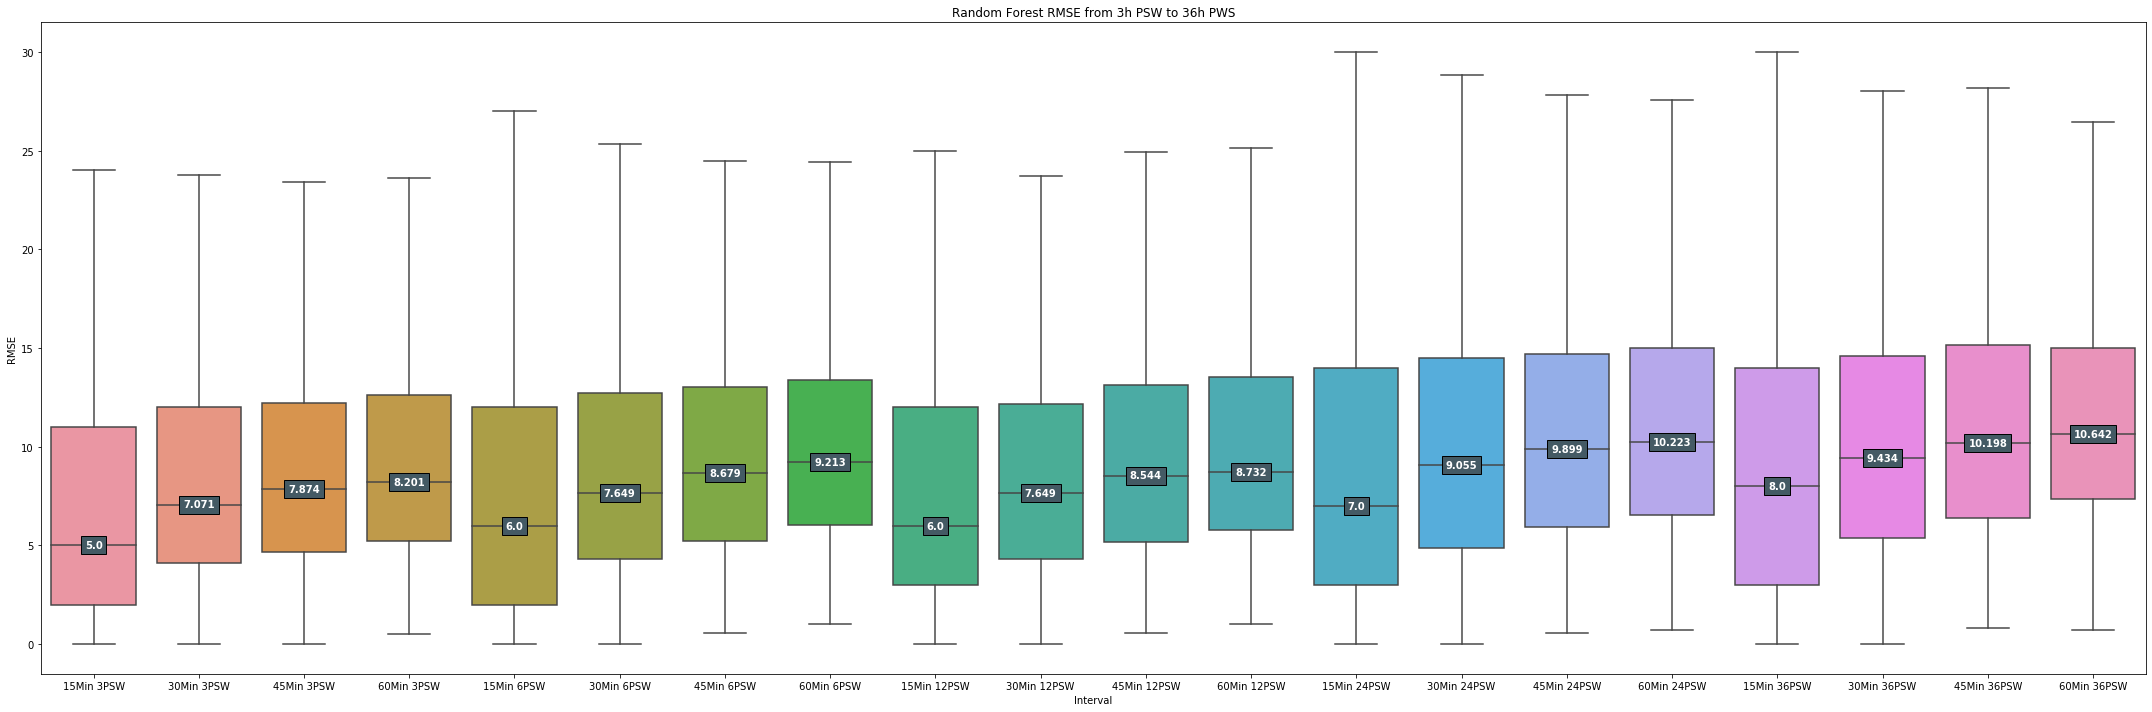

In [21]:

plt.figure(figsize=(30, 10))
plt.title("Random Forest RMSE from 3h PSW to 36h PWS")
plt.ylabel("RMSE")
plt.xlabel("")


box_plot = sns.boxplot(x="Interval" ,y="RMSE" ,data=window, showfliers = False)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*5].get_ydata()[0],3) 
    
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    

box_plot.figure.tight_layout()